In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import sklearn.linear_model as sk_lm
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection  import train_test_split
import os
import glob
#import 
%matplotlib inline

In [18]:
df = pd.read_csv("/media/radial/Work/Work/Work on datasets/Linear*/Camera.csv", sep=";")
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0


In [22]:
df.drop(0,axis = 0,inplace=True)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
5,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [23]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [25]:
for i in df.columns:
    print(i,df[i].value_counts())
    print("__________________________________________")

Model Casio QV-5700                 1
Fujifilm FinePix F455 Zoom    1
Olympus Stylus 750            1
Casio Exilim EX-Z3            1
Kodak Z650                    1
Canon PowerShot A620          1
Olympus FE-170                1
Fujifilm MX-600 Zoom          1
Panasonic Lumix DMC-L10       1
Olympus SP-550 UZ             1
HP Photosmart 635             1
Fujifilm FinePix F480 Zoom    1
Sony DSC-P200                 1
Epson PhotoPC L-500V          1
Casio QV-R40                  1
Panasonic Lumix DMC-FX2       1
Kodak Z712                    1
Nikon Coolpix 600             1
Ricoh RDC-i700                1
Canon PowerShot G3            1
Kodak DC3200                  1
Olympus C-60 Zoom             1
Pentax Optio S10              1
Sony DSC-W35                  1
Olympus D-580 Zoom            1
Epson PhotoPC 700             1
Canon PowerShot A430          1
Kodak Z740                    1
Canon PowerShot A510          1
Nikon D70s                    1
                             ..
Ol

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 1 to 1038
Data columns (total 13 columns):
Model                      1038 non-null object
Release date               1038 non-null object
Max resolution             1038 non-null object
Low resolution             1038 non-null object
Effective pixels           1038 non-null object
Zoom wide (W)              1038 non-null object
Zoom tele (T)              1038 non-null object
Normal focus range         1038 non-null object
Macro focus range          1037 non-null object
Storage included           1036 non-null object
Weight (inc. batteries)    1036 non-null object
Dimensions                 1036 non-null object
Price                      1038 non-null object
dtypes: object(13)
memory usage: 113.5+ KB


In [28]:
df.describe()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038,1038,1038,1038,1038,1038,1038,1038,1037,1036,1036,1036,1038
unique,1038,14,99,70,16,25,100,32,29,44,237,101,43
top,Casio QV-5700,2007,3072.0,2048.0,3.0,38.0,114.0,50.0,10.0,16.0,320.0,90.0,149.0
freq,1,163,108,187,197,259,163,286,200,279,34,48,112


In [31]:
df[['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']] = df[['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']].astype(float)

In [32]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


Release date -----------------------------------------------------------------


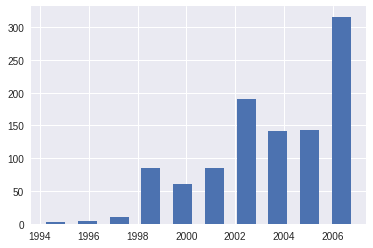

Max resolution -----------------------------------------------------------------


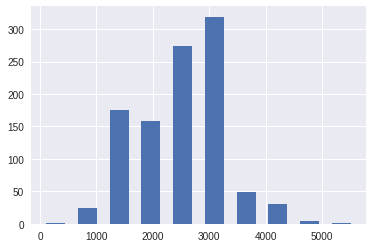

Low resolution -----------------------------------------------------------------


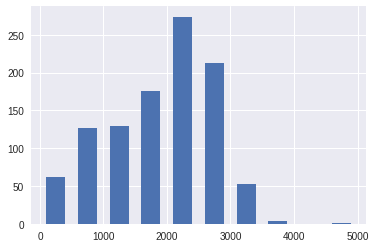

Effective pixels -----------------------------------------------------------------


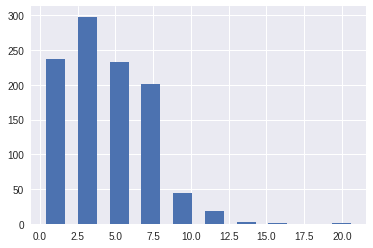

Zoom wide (W) -----------------------------------------------------------------


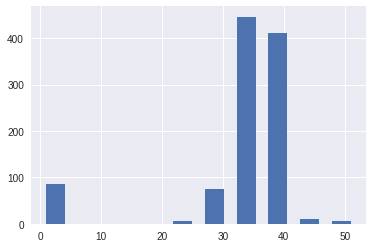

Zoom tele (T) -----------------------------------------------------------------


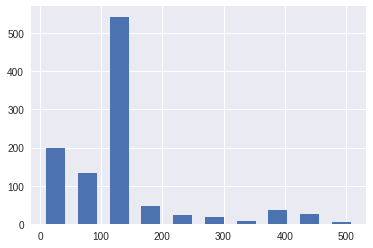

Normal focus range -----------------------------------------------------------------


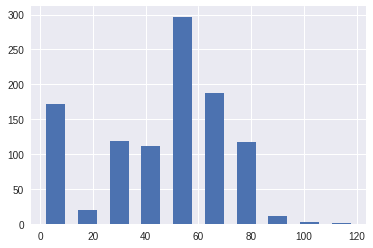

Macro focus range -----------------------------------------------------------------
Storage included -----------------------------------------------------------------
Weight (inc. batteries) -----------------------------------------------------------------
Dimensions -----------------------------------------------------------------
Price -----------------------------------------------------------------


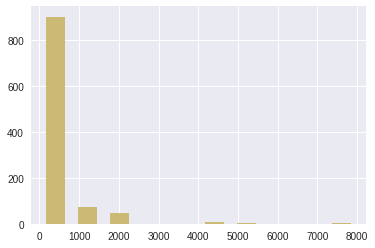

In [51]:
n_cols = ['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']
for i in n_cols:
    try:
        print(i,"-----------------------------------------------------------------")
        plt.hist(df[i],rwidth=0.6)
        plt.show()
    except ValueError:
        ""

In [47]:
# replacing nulls
df[df["Macro focus range"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [48]:
df[df["Storage included"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
346,HP Photosmart R927,2006.0,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [49]:
df[df["Weight (inc. batteries)"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
346,HP Photosmart R927,2006.0,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [50]:
df[df["Dimensions"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
346,HP Photosmart R927,2006.0,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0
